In [118]:
import numpy as np
import pandas as pd

In [119]:
df = pd.read_csv("spam.csv", encoding='latin-1')

# Drop unnecessary unnamed columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']  # Rename for clarity


In [120]:
df.sample(5)

,label,text
4634,ham,How come i din c Ì_... Yup i cut my hair...
5194,ham,Ok... Take ur time n enjoy ur dinner...
240,ham,Tomarrow final hearing on my laptop case so i ...
1920,ham,Dont know you bring some food
475,ham,Ok I'm gonna head up to usf in like fifteen mi...


In [121]:
df.shape

(5572, 2)

In [122]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [124]:
cols_to_drop = [col for col in ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] if col in df.columns]
df.drop(columns=cols_to_drop, inplace=True)


In [125]:
df.sample(5)

,label,text
1702,ham,I have lost 10 kilos as of today!
5158,ham,I will come with karnan car. Please wait till ...
4730,ham,K:)eng rocking in ashes:)
4387,ham,"see you then, we're all christmassy here!"
3365,ham,I am waiting for your call sir.


In [126]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [127]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [128]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("E:/spam/spam.csv", encoding='latin1')  # 'utf-8' may give errors

# Keep only the necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['target', 'text']  # Rename: v1 → target, v2 → text

# Encode the target column
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])  # spam = 1, ham = 0

# Check
print(df.head())
print(encoder.classes_)  # Output: ['ham', 'spam']


   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...
['ham' 'spam']


In [129]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [130]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [131]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [132]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [133]:
df.duplicated().sum()

np.int64(0)

In [134]:
df.shape

(5169, 2)

## 2.EDA

In [135]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [136]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

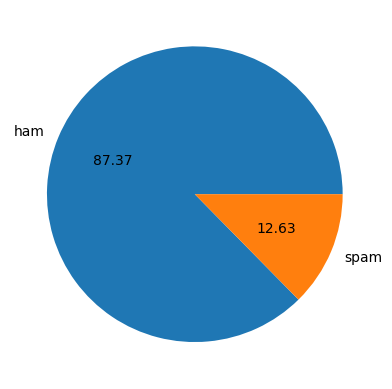

In [137]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [138]:
# Data is imbalanced

In [139]:

import nltk

In [140]:
!pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [141]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [142]:
df['num_characters'] = df['text'].apply(len)

In [143]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [144]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))


In [145]:

df['num_characters'] = df['text'].apply(len)

In [146]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [147]:
df['num_sentences'] = df['text'].apply(lambda x: len(str(x).split('.')))


In [148]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [149]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.934030
std,58.236293,11.068488,2.541852
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,4.000000
max,910.000000,171.000000,42.000000


In [150]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.916519
std,56.358207,11.116240,2.638732
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,4.000000
max,910.000000,171.000000,42.000000


In [151]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.055130
std,30.137753,5.967672,1.725848
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,14.000000


In [152]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

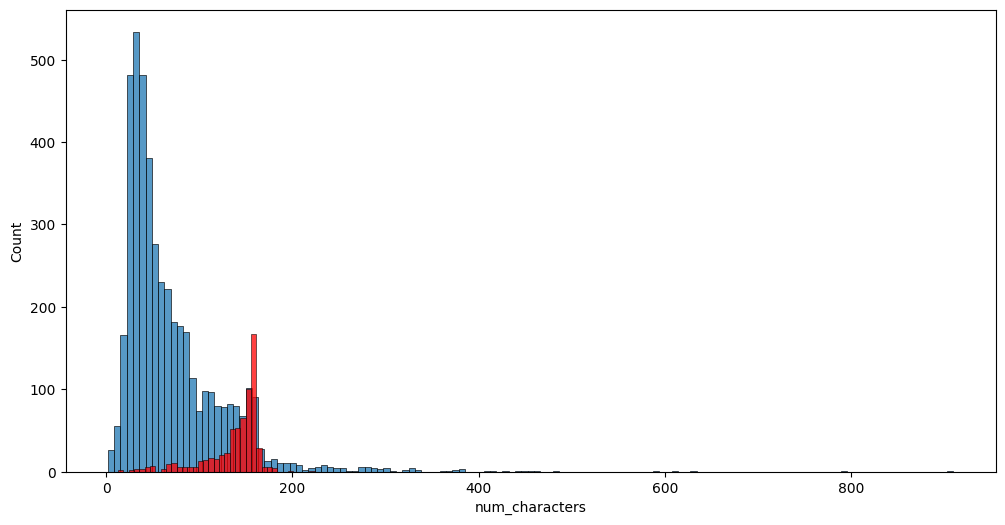

In [153]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

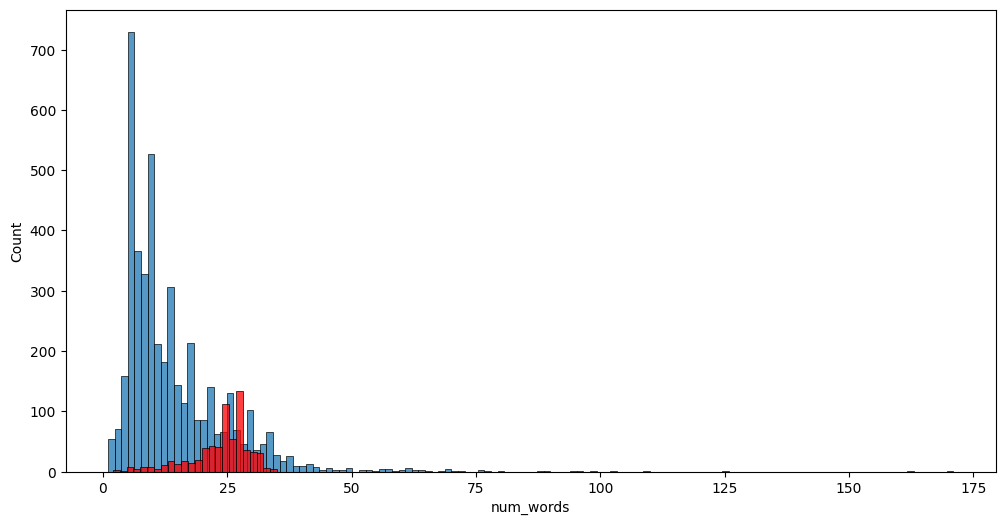

In [154]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

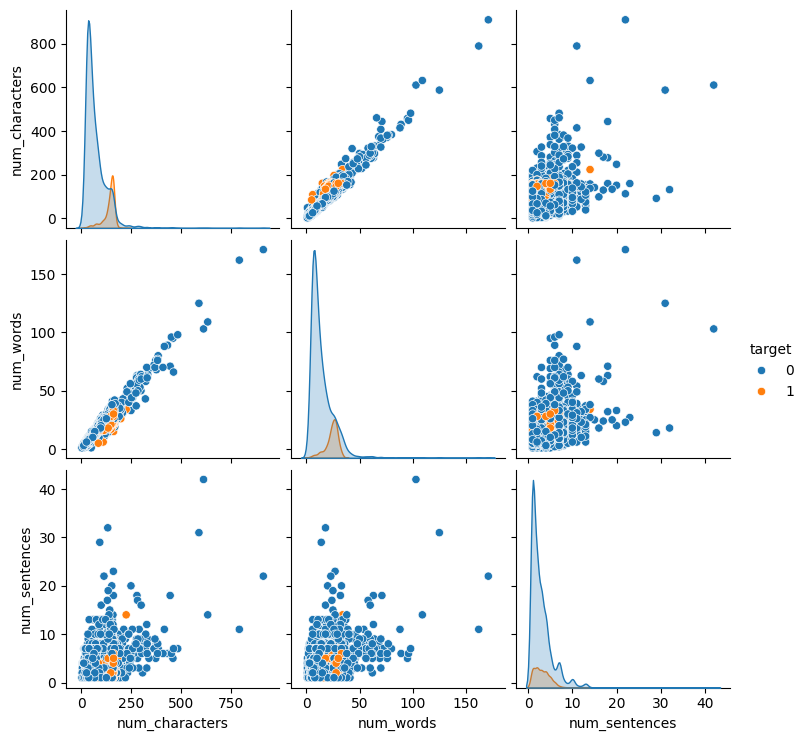

In [155]:
sns.pairplot(df,hue='target')

<Axes: >

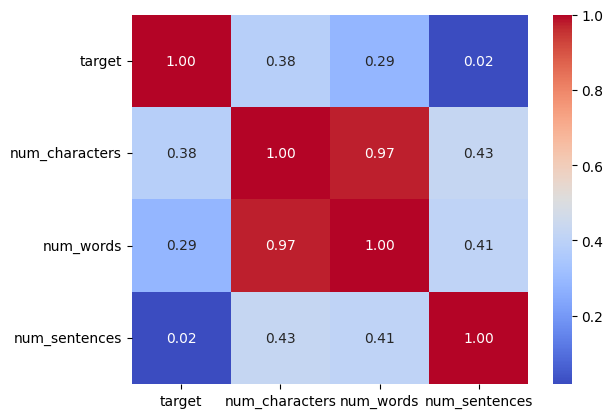

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")



## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [157]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [158]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # Lowercase
    text = nltk.word_tokenize(text)  # Tokenize

    # Keep only alphanumeric tokens
    text = [word for word in text if word.isalnum()]

    # Remove stopwords
    text = [word for word in text if word not in stopwords.words('english')]

    # Stemming
    text = [ps.stem(word) for word in text]

    return " ".join(text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')  # If not already downloaded


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [160]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download resources (only needs to run once)
nltk.download('punkt_tab')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if word not in stopwords.words('english')]
    text = [ps.stem(word) for word in text]
    return " ".join(text)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\victus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [161]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [162]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [163]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [164]:
df['transformed_text'] = df['text'].apply(transform_text)

In [165]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [166]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


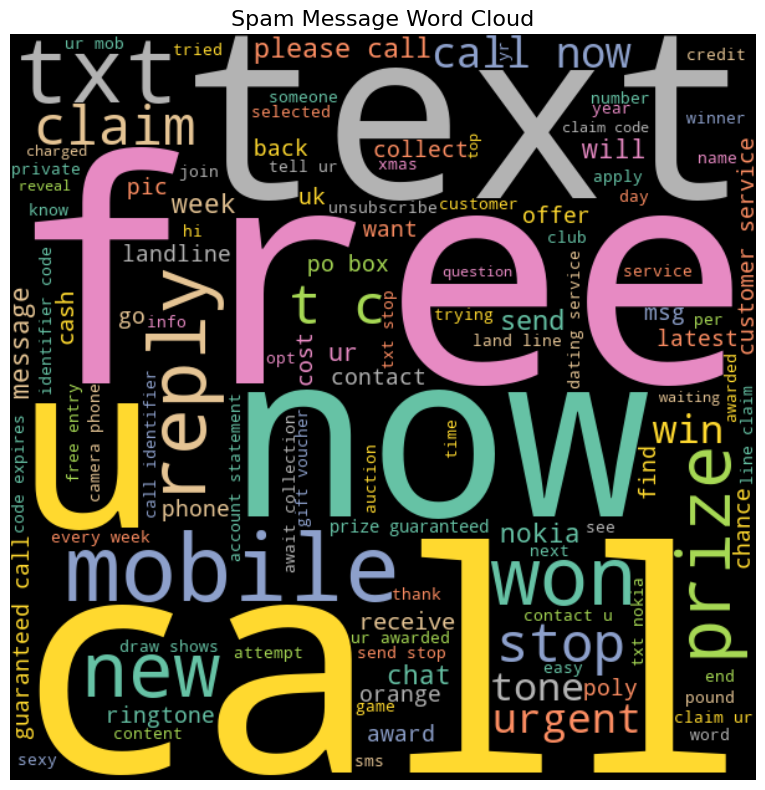

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("E:/spam/spam.csv", encoding='latin1')[['v1', 'v2']]
df.columns = ['target', 'text']

# Encode target: spam = 1, ham = 0
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

# OPTIONAL: Basic text preprocessing
def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]
    return " ".join(words)

# Apply transform
df['clean_text'] = df['text'].apply(transform_text)

# Combine spam text
spam_text = " ".join(df[df['target'] == 1]['clean_text'])

# Generate WordCloud
wordcloud = WordCloud(
    width=600,
    height=600,
    background_color='black',
    colormap='Set2',
    max_words=200,
    min_font_size=10
).generate(spam_text)

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Spam Message Word Cloud", fontsize=16)
plt.tight_layout()
plt.show()


In [168]:
df.head()

,target,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do think he goes to usf he lives around ...


In [169]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for word in text:
        if word.isalnum():  # Keep only letters and numbers
            y.append(word)
    
    text = y[:]
    y.clear()
    
    for word in text:
        if word not in stop_words and word not in string.punctuation:
            y.append(ps.stem(word))
    
    return " ".join(y)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [170]:
df['transformed_text'] = df['text'].apply(transform_text)


In [171]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [172]:
len(spam_corpus)

11490

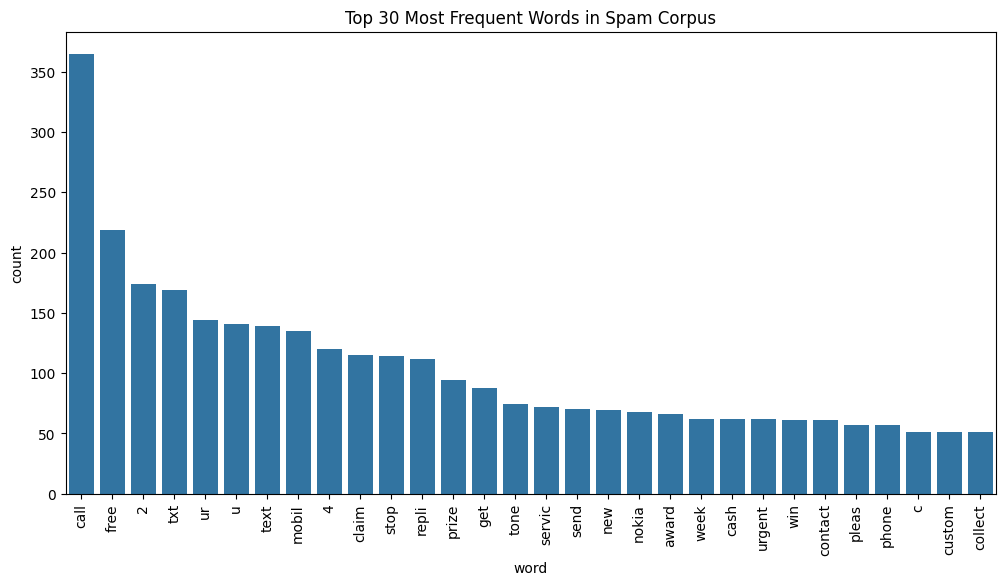

In [173]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the 30 most common words
top_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
top_df = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=top_df)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Frequent Words in Spam Corpus")
plt.show()


In [174]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [175]:
len(ham_corpus)

38221

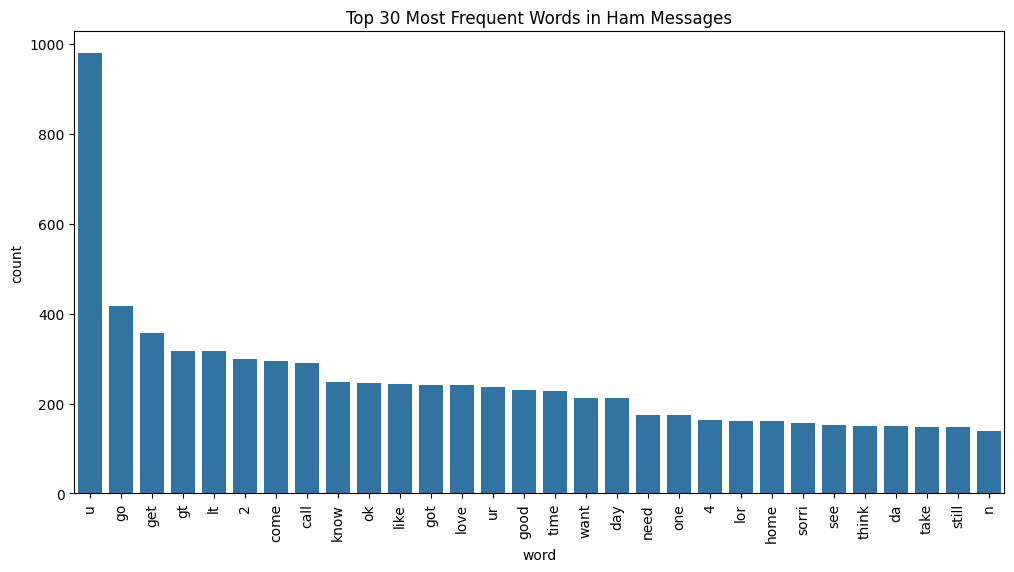

In [176]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 30 words from ham_corpus
top_words = Counter(ham_corpus).most_common(30)

# Create DataFrame
top_df = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=top_df)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Frequent Words in Ham Messages")
plt.show()


In [177]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,clean_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do think he goes to usf he lives around ...,nah think goe usf live around though


## 4. Model Building

In [178]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [179]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [180]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [181]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [182]:
X.shape

(5572, 3000)

In [183]:
y = df['target'].values

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [186]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [187]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [188]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8654708520179372
[[840 117]
 [ 33 125]]
0.5165289256198347


In [189]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [190]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187


In [191]:
# tfidf --> MNB

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [198]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [200]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [201]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9721973094170404, 0.9847328244274809)

In [207]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    return acc, prec


In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier


clfs = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
 
}


In [212]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Logistic Regression
Accuracy -  0.9560538116591928
Precision -  0.990990990990991
For  SVM
Accuracy -  0.9704035874439462
Precision -  1.0
For  Naive Bayes
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  Decision Tree
Accuracy -  0.9524663677130045
Precision -  0.8888888888888888
For  KNN
Accuracy -  0.9049327354260089
Precision -  1.0
For  Random Forest
Accuracy -  0.9659192825112107
Precision -  0.9918032786885246
For  AdaBoost
Accuracy -  0.9121076233183857
Precision -  0.8947368421052632
For  Bagging
Accuracy -  0.9542600896860987
Precision -  0.9212598425196851
For  Extra Trees
Accuracy -  0.9730941704035875
Precision -  1.0
For  Gradient Boosting
Accuracy -  0.9488789237668162
Precision -  0.963302752293578


In [213]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [214]:
performance_df

,Algorithm,Accuracy,Precision
1,SVM,0.970404,1.000000
4,KNN,0.904933,1.000000
8,Extra Trees,0.973094,1.000000
5,Random Forest,0.965919,0.991803
2,Naive Bayes,0.965022,0.991736
0,Logistic Regression,0.956054,0.990991
9,Gradient Boosting,0.948879,0.963303
7,Bagging,0.954260,0.921260
6,AdaBoost,0.912108,0.894737
3,Decision Tree,0.952466,0.888889


In [215]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [216]:
performance_df1

,Algorithm,variable,value
0,SVM,Accuracy,0.970404
1,KNN,Accuracy,0.904933
2,Extra Trees,Accuracy,0.973094
3,Random Forest,Accuracy,0.965919
4,Naive Bayes,Accuracy,0.965022
5,Logistic Regression,Accuracy,0.956054
6,Gradient Boosting,Accuracy,0.948879
7,Bagging,Accuracy,0.954260
8,AdaBoost,Accuracy,0.912108
9,Decision Tree,Accuracy,0.952466


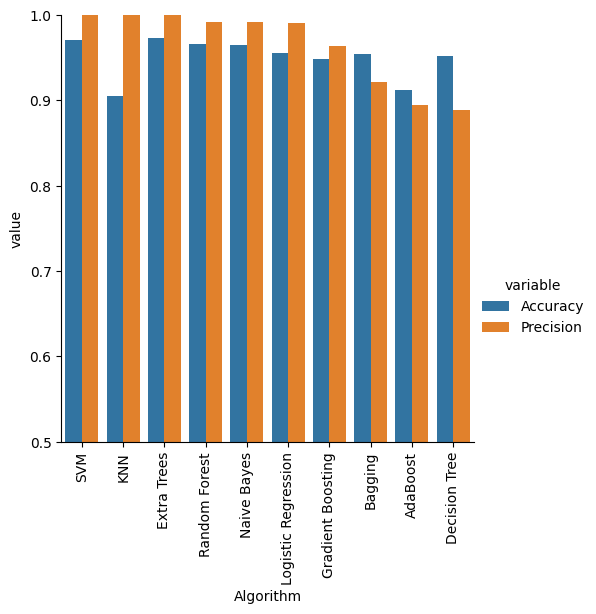

In [217]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [218]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [219]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [220]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [221]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [222]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [223]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVM,0.970404,1.000000,0.970404,1.000000,0.970404,1.000000,0.970404,1.000000
1,KNN,0.904933,1.000000,0.904933,1.000000,0.904933,1.000000,0.904933,1.000000
2,Extra Trees,0.973094,1.000000,0.973094,1.000000,0.973094,1.000000,0.973094,1.000000
3,Random Forest,0.965919,0.991803,0.965919,0.991803,0.965919,0.991803,0.965919,0.991803
4,Naive Bayes,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736
5,Logistic Regression,0.956054,0.990991,0.956054,0.990991,0.956054,0.990991,0.956054,0.990991
6,Gradient Boosting,0.948879,0.963303,0.948879,0.963303,0.948879,0.963303,0.948879,0.963303
7,Bagging,0.954260,0.921260,0.954260,0.921260,0.954260,0.921260,0.954260,0.921260
8,AdaBoost,0.912108,0.894737,0.912108,0.894737,0.912108,0.894737,0.912108,0.894737
9,Decision Tree,0.952466,0.888889,0.952466,0.888889,0.952466,0.888889,0.952466,0.888889


In [224]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [225]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [226]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [227]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9766816143497757
Precision 1.0


In [228]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [229]:
from sklearn.ensemble import StackingClassifier

In [233]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [234]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9802690582959641
Precision 0.9788732394366197


In [235]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))